# Importing the necessary libraries

In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Removing useless words and phrases from the file

I removed some irrelevant words and characters. Also, I explored the data a little bit (see graphs below)

<ipython-input-2-76911395bd3d>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[0], palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

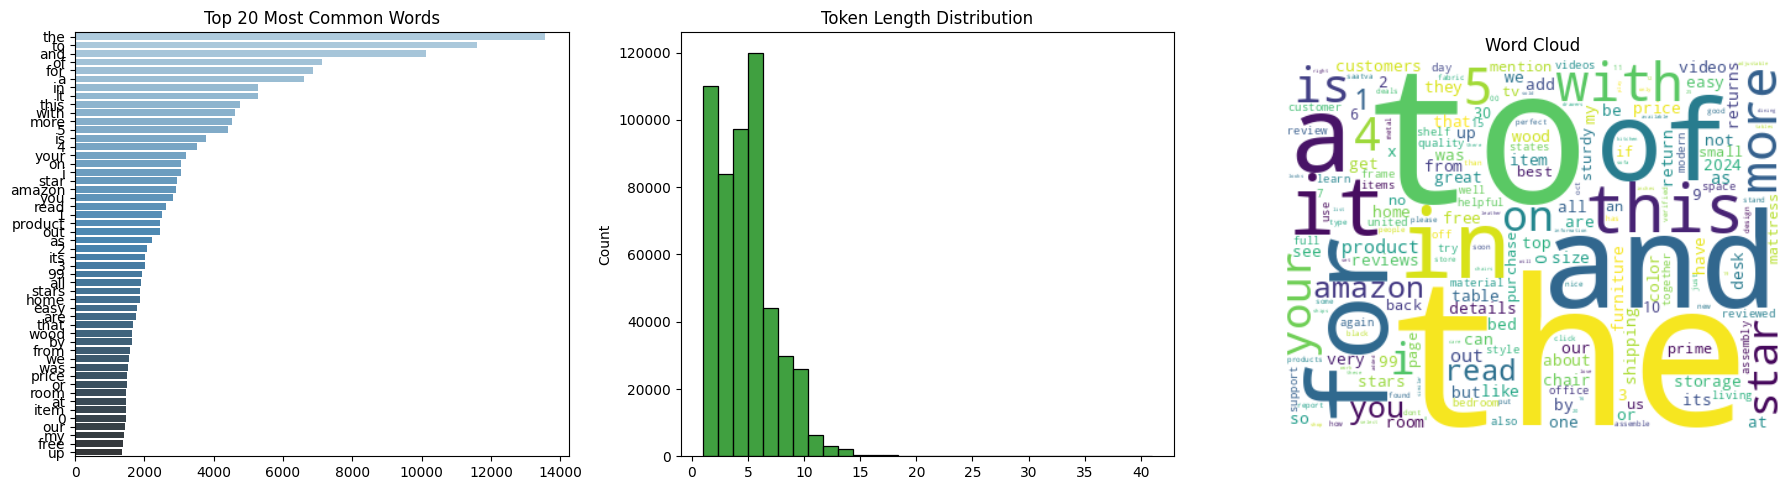

In [ ]:
# 1. Load the text file
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 2. Clean the data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove boilerplate words and irrelevant sections
    boilerplate_words = ['Sign In', 'Sign Up', 'JavaScript', 'My Cart', 'Compare Products',
                         'Explore Our Other Shops', 'Customer Service', 'Privacy Policy', 'Cart']

    for word in boilerplate_words:
        text = re.sub(rf'\b{word}\b', '', text, flags=re.IGNORECASE)

    # Remove any remaining non-alphanumeric characters, except for essential punctuation
    text = re.sub(r'[^\w\s.,-]', '', text)

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# 3. Tokenize text for analysis
def tokenize(text):
    tokens = re.findall(r'\b\w+\b', text.lower())  # Simple tokenization (lowercase words)
    return tokens

# 4. Perform EDA
def eda_on_text(tokens):
    # Token frequency
    token_freq = Counter(tokens)

    # Plotting the top 20 most frequent words
    common_words = token_freq.most_common(20)
    words, counts = zip(*common_words)

    # Character length distribution
    token_lengths = [len(token) for token in tokens]

    # Word cloud
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(token_freq)

    # Set up plot layout (small graphs in the same cell)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Bar plot for most common words
    sns.barplot(x=list(counts), y=list(words), ax=axes[0], palette='Blues_d')
    axes[0].set_title("Top 20 Most Common Words")

    # Character length distribution
    sns.histplot(token_lengths, bins=30, ax=axes[1], color='green')
    axes[1].set_title("Token Length Distribution")

    # Word cloud plot
    axes[2].imshow(wordcloud, interpolation='bilinear')
    axes[2].axis("off")
    axes[2].set_title("Word Cloud")

    plt.tight_layout()
    plt.show()

# 5. Main execution
file_path = '/content/merged_scraped_data.txt'  # Path to your text file

# Load and clean text
raw_data = load_text(file_path)
cleaned_data = clean_text(raw_data)

# Tokenize cleaned text
tokens = tokenize(cleaned_data)

# Perform EDA
eda_on_text(tokens)

Here's a more enhanced approach.

In [ ]:
# 1. Load the text file
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 2. Improved clean the data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)

    # Remove boilerplate words and irrelevant sections more effectively
    boilerplate_words = [
        'Sign In', 'Sign Up', 'JavaScript', 'My Cart', 'Compare Products',
        'Explore Our Other Shops', 'Customer Service', 'Privacy Policy',
        'Terms of Service', 'Membership', 'Limited-Time Offer',
        'All Access', 'Current price', 'Original price'
    ]

    for word in boilerplate_words:
        text = re.sub(rf'\b{word}\b', '', text, flags=re.IGNORECASE)

    # Remove repeated punctuations (e.g., multiple spaces or dashes)
    text = re.sub(r'[-\s]+', ' ', text)

    # Remove any remaining non-alphanumeric characters except for essential punctuation
    text = re.sub(r'[^\w\s.,-]', '', text)

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert to lowercase
    text = text.lower()

    return text

# 3. Save cleaned data to a text file
def save_cleaned_data(cleaned_data, output_file_path):
    with open(output_file_path, 'w', encoding='utf-8') as file:
        file.write(cleaned_data)

# 4. Main execution
file_path = 'merged_scraped_data.txt'  # Path to your input text file
output_file_path = 'cleaned_furniture_data.txt'   # Define your output file path

# Load and clean text
raw_data = load_text(file_path)
cleaned_data = clean_text(raw_data)

# Save the cleaned data
save_cleaned_data(cleaned_data, output_file_path)
print(f"Cleaned data saved to {output_file_path}.")

Cleaned data saved to cleaned_furniture_data.txt.
